# 1. Data Preparation

**In the data preparation stage, please adopt a comprehensive approach,
addressing the following areas:**
> 1.1. Handle any missing data by identifying and managing incomplete records or missing values
to ensure the dataset is ready for further analysis.
<br>1.2. Perform relevant feature selection by determining which features are most important for
your goal. Additionally, apply feature scaling to normalize the data and ensure all features
contribute equally to the model, avoiding biases due to differing ranges.
<br>1.3. Focus on identifying the top-performing suppliers for each task by analysing the cost data.
Since not all suppliers perform equally well, you should remove the worst performing
suppliers from the dataset to make the following tasks more manageable.

## Dataset load

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
# import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import copy
import random


# import datasets

tasks = pd.read_csv('/content/drive/MyDrive/UoM MSc DS/Python for BA/Data/tasks.csv')
suppliers = pd.read_csv('/content/drive/MyDrive/UoM MSc DS/Python for BA/Data/suppliers.csv')
cost = pd.read_csv('/content/drive/MyDrive/UoM MSc DS/Python for BA/Data/cost.csv')

In [66]:
# Check df 1. tasks
tasks.head(1)

,Task ID,TF1,TF2,TF3,TF4,TF5,TF6,TF7,TF8,TF9,...,TF107,TF108,TF109,TF110,TF111,TF112,TF113,TF114,TF115,TF116
0,T1,332,5123,647174452,2111,41.2063244192855%,140069227,22%,1438,0.280695,...,50,0,93828.91,759621.99,12264068,0,382,0.074566,28150864,0.04


In [67]:
tasks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Columns: 117 entries, Task ID to TF116
dtypes: float64(56), int64(58), object(3)
memory usage: 119.0+ KB


In [68]:
# Check df 2. suppliers
suppliers.head(1)

,Features,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S55,S56,S57,S58,S59,S60,S61,S62,S63,S64
0,SF1,100,100,100,100,10,10,100,100,1000,...,10,10,100,1000,10,10,100,1000,100,100


In [69]:
# Transpose and change the shape
suppliers.index = suppliers['Features']
suppliers.index.name = 'Supplier ID'

suppliers = suppliers.drop('Features', axis=1)

suppliers = suppliers.transpose()

suppliers.head(1)

Supplier ID,SF1,SF2,SF3,SF4,SF5,SF6,SF7,SF8,SF9,SF10,SF11,SF12,SF13,SF14,SF15,SF16,SF17,SF18
S1,100,1000,1000,50,20,10,2,80,2000,100,1000,5,1000,1000,500,5000,100,96


In [70]:
# Check df 3. cost
cost.head(1)

,Task ID,Supplier ID,Cost
0,T34,S1,0.478219


In [71]:
cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7680 entries, 0 to 7679
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Task ID      7680 non-null   object 
 1   Supplier ID  7680 non-null   object 
 2   Cost         7680 non-null   float64
dtypes: float64(1), object(2)
memory usage: 180.1+ KB


In [72]:
cost.groupby('Supplier ID').describe()

Cost                                                    \
             count      mean       std       min       25%       50%   
Supplier ID                                                            
S1           120.0  0.443069  0.056911  0.322824  0.409920  0.445100   
S10          120.0  0.403872  0.058571  0.307112  0.355072  0.409107   
S11          120.0  0.401271  0.052396  0.307484  0.355307  0.405965   
S12          120.0  0.415246  0.055589  0.302905  0.372291  0.421329   
S13          120.0  0.407144  0.055184  0.305388  0.360740  0.414593   
...            ...       ...       ...       ...       ...       ...   
S63          120.0  0.418999  0.054589  0.309390  0.375066  0.420294   
S64          120.0  0.405255  0.052571  0.307449  0.364090  0.406298   
S7           120.0  0.413232  0.054336  0.302261  0.375506  0.419115   
S8           120.0  0.418884  0.051507  0.299798  0.381543  0.414817   
S9           120.0  0.414777  0.050464  0.301240  0.386813  0.414180   

                                 
                  75%       max  
Supplier ID                      
S1           0.473163  0.694525  
S10          0.441094  0.645559  
S11          0.441124  0.621962  
S12          0.451475  0.651132  
S13          0.444870  0.657804  
...               ...       ...  
S63          0.456661  0.689491  
S64          0.441301  0.559792  
S7           0.445572  0.666881  
S8           0.447079  0.657675  
S9           0.439706  0.663978  

[64 rows x 8 columns]

## 1.1. Check missing value

In [73]:
# Missing values
print('Missing values in suppliers dataset:', suppliers.isnull().sum().sum())
print('Missing values in cost dataset:', cost.isnull().sum().sum())
print('Missing values in tasks dataset:', tasks.isnull().sum().sum())

Missing values in suppliers dataset: 0
Missing values in cost dataset: 0
Missing values in tasks dataset: 0


In [74]:
# Tasks (unrelated to cost)

print("No of Task ID in Tasks:",tasks['Task ID'].nunique())
print("No of Task ID in cost:",cost['Task ID'].nunique())

No of Task ID in Tasks: 130
No of Task ID in cost: 120


In [75]:
cost_match = cost['Task ID'].unique()

tasks=tasks.loc[tasks['Task ID'].isin(cost_match)]

In [76]:
tasks['Task ID'].nunique()

120

In [77]:
print("'tasks' dataset info:\n{} tasks\n{} task features".format(len(tasks),len(tasks.columns[1:])))
#suppliers
print("\n'suppliers' dataset info:\n{} suppliers\n{} supplier features".format(len(suppliers),len(suppliers.columns[1:])))
#costs
print("\n'cost' dataset info:\n{} tasks\n{} suppliers\n{} cost values".format(len(cost.loc[:,'Task ID'].unique()), \
    len(cost.loc[:,'Supplier ID'].unique()), len(cost.loc[:, 'Cost'])))

'tasks' dataset info:
120 tasks
116 task features

'suppliers' dataset info:
64 suppliers
17 supplier features

'cost' dataset info:
120 tasks
64 suppliers
7680 cost values


## 1.2. Feature Selection & Scaling

* Perform relevant feature selection by determining which features are most important for
your goal. Additionally, apply feature scaling to normalize the data and ensure all features
contribute equally to the model, avoiding biases due to differing ranges.

***Note***<br>
The reason of Feature Selection: Improves Model Performance
* Removing irrelevant or redundant features can help the model generalize better.
* (Modifiable) Here we get rid of below 0.1% of features

Scaling : MinMaxScaler
* (Suji) I propose using MinMaxScaler. While StandardScaler is less affected by outliers, we've already mitigated this issue through feature selection. Since StandardScaler is generally used for normally distributed data and MinMaxScaler is more suitable when the maximum and minimum values are crucial, I think MinMaxScaler aligns better with our goal of minimizing costs, where the minimum value is particularly significant.



### 1.2.1. Feature Selection

In [78]:
suppliers

Supplier ID,SF1,SF2,SF3,SF4,SF5,SF6,SF7,SF8,SF9,SF10,SF11,SF12,SF13,SF14,SF15,SF16,SF17,SF18
S1,100,1000,1000,50,20,10,2,80,2000,100,1000,5,1000,1000,500,5000,100,96
S2,100,1000,1000,50,20,10,0,80,2000,100,1000,5,1000,1000,500,5000,100,96
S3,100,1000,1000,50,20,10,2,80,2000,100,1000,5,1000,1000,500,5000,0,96
S4,100,1000,1000,50,20,10,2,80,2000,100,1000,5,1000,1000,500,5000,5000,96
S5,10,1000,100,500,200,10,2,80,200,100,2000,8,2000,100,2000,5000,15000,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S60,10,100,100,5,200,10,2,8,200,100,100,8,1000,100,50,5000,7500,98
S61,100,2000,1000,5,2,1,1,8,4000,500,1000,1,1000,2000,50,500,1000,96
S62,1000,1000,2000,5,200,10,2,500,4000,500,100,8,2000,1000,500,5000,15000,90
S63,100,1000,1000,50,200,1,2,8,4000,10,2000,1,100,1000,2000,5000,7500,90


In [79]:
# Feature Importance

from sklearn.ensemble import RandomForestRegressor

# Reset indices before merging to use the default integer index
tasks = tasks.reset_index()
suppliers = suppliers.reset_index()
suppliers = suppliers.rename(columns={'index': 'Supplier ID'})


# Combine datasets for quick analysis (without costs for now)
combined_df = pd.merge(cost, tasks, how='inner', on='Task ID')

combined = pd.merge(combined_df, suppliers, how='inner', on='Supplier ID')

# Placeholder target variable (use real costs in actual analysis)
np.random.seed(42)
y = np.random.rand(combined.shape[0])

# Convert percentage strings to floats
for col in combined.columns:
    if combined[col].dtype == 'object':  # Check if column is of object type (often strings)
        try:
            # Attempt to convert to numeric, handling errors
            combined[col] = pd.to_numeric(combined[col].str.rstrip('%'), errors='coerce') /100
        except AttributeError:
            pass # Skip if not a string or does not contain '%'

In [80]:
combined.head(1)

,Task ID,Supplier ID,Cost,index,TF1,TF2,TF3,TF4,TF5,TF6,...,SF9,SF10,SF11,SF12,SF13,SF14,SF15,SF16,SF17,SF18
0,NaN,NaN,0.478219,33,706,2539,428536374,367,0.144545,35342375,...,2000,100,1000,5,1000,1000,500,5000,100,96


In [81]:
# Feature Importance

from sklearn.ensemble import RandomForestRegressor

# Combine datasets for quick analysis (without costs for now)
combined = tasks.merge(suppliers, left_index=True, right_index=True)
# Placeholder target variable (use real costs in actual analysis)
np.random.seed(42)
y = np.random.rand(combined.shape[0])

# Convert percentage strings to floats
for col in combined.columns:
    if combined[col].dtype == 'object':  # Check if column is of object type (often strings)
        try:
            # Attempt to convert to numeric, handling errors
            combined[col] = pd.to_numeric(combined[col].str.rstrip('%'), errors='coerce') /100
        except AttributeError:
            pass # Skip if not a string or does not contain '%'


# Fit a Random Forest for feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(combined.iloc[:, 1:], y)

# Get feature importances
importances = rf.feature_importances_
feature_names = combined.columns[1:]
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

importance_df.head(10)


,Feature,Importance
39,TF39,0.057449
131,SF14,0.037774
37,TF37,0.035637
116,TF116,0.032501
114,TF114,0.027253
28,TF28,0.026854
45,TF45,0.024368
110,TF110,0.022311
74,TF74,0.021737
68,TF68,0.019503


In [82]:
importance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 39 to 0
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature     136 non-null    object 
 1   Importance  136 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


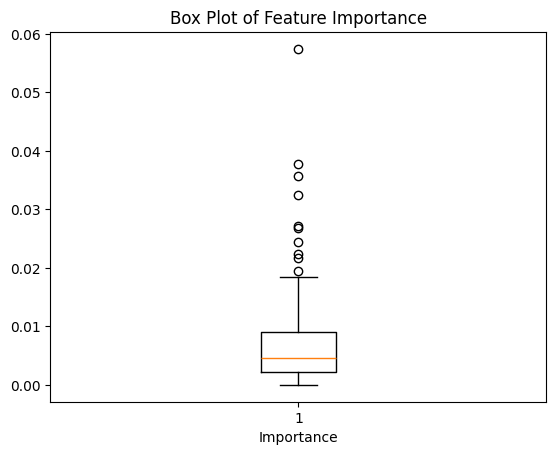

In [83]:
plt.boxplot(importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Box Plot of Feature Importance')
plt.show()

In [84]:
importance_df['Importance'].describe()

,Importance
count,136.000000
mean,0.007353
std,0.008547
min,0.000000
25%,0.002161
50%,0.004586
75%,0.009095
max,0.057449


In [85]:
# (Modifiable)Remove under 0.1% of Importance

importance_df = importance_df[importance_df['Importance'] >= 0.001]

In [86]:
# Check the feature list
feature_list = importance_df['Feature'].unique()
feature_list

# Feature Separate
features_T = [feature for feature in feature_list if feature.startswith('T')]
features_S = [feature for feature in feature_list if feature.startswith('S')]

print('Tasks Features:', features_T)
print('Suppliers Features:', features_S)

Tasks Features: ['TF39', 'TF37', 'TF116', 'TF114', 'TF28', 'TF45', 'TF110', 'TF74', 'TF68', 'TF27', 'TF18', 'TF78', 'TF72', 'TF36', 'TF113', 'TF93', 'TF115', 'TF67', 'TF16', 'TF26', 'TF44', 'TF102', 'TF52', 'TF29', 'TF91', 'TF17', 'TF70', 'TF9', 'TF46', 'TF13', 'TF107', 'TF50', 'TF95', 'TF73', 'TF77', 'TF22', 'TF5', 'TF21', 'TF24', 'TF82', 'TF111', 'TF23', 'TF20', 'TF94', 'TF80', 'TF59', 'TF38', 'TF4', 'TF48', 'TF90', 'TF65', 'TF64', 'TF11', 'TF56', 'TF54', 'TF25', 'TF30', 'TF62', 'TF2', 'TF33', 'TF3', 'TF42', 'TF89', 'TF51', 'TF103', 'TF81', 'TF71', 'TF101', 'TF6', 'TF66', 'TF8', 'TF14', 'TF61', 'TF85', 'TF98', 'TF76', 'TF1', 'TF69', 'TF105', 'TF7', 'TF47', 'TF106', 'TF49', 'TF32', 'TF10', 'TF63', 'TF109', 'TF43', 'TF41', 'TF12', 'TF83', 'TF86', 'TF87', 'TF58', 'TF55', 'TF40', 'TF53', 'TF60', 'TF99', 'TF57']
Suppliers Features: ['SF14', 'SF2', 'SF16', 'SF15', 'SF17', 'SF13', 'SF18', 'SF10', 'SF12', 'SF6', 'SF1', 'SF7', 'SF4', 'SF5', 'SF3', 'SF11', 'SF9']


In [87]:
# Select Tasks Features  (117 to 97)

tasks = tasks[['Task ID'] + features_T]
tasks.head(1)

,Task ID,TF39,TF37,TF116,TF114,TF28,TF45,TF110,TF74,TF68,...,TF83,TF86,TF87,TF58,TF55,TF40,TF53,TF60,TF99,TF57
0,T1,0.08,50685398,0.04,0.074566,35.825175,109480953,759621.99,419,6.26,...,561,16463426.25,73331323,488797828,0.24,4009,0.13,1930,553,0.87


In [88]:
# Select Suppliers Features

suppliers = suppliers[['Supplier ID'] + features_S]
suppliers

Supplier ID,Supplier ID,SF14,SF2,SF16,SF15,SF17,SF13,SF18,SF10,SF12,SF6,SF1,SF7,SF4,SF5,SF3,SF11,SF9
0,S1,1000,1000,5000,500,100,1000,96,100,5,10,100,2,50,20,1000,1000,2000
1,S2,1000,1000,5000,500,100,1000,96,100,5,10,100,0,50,20,1000,1000,2000
2,S3,1000,1000,5000,500,0,1000,96,100,5,10,100,2,50,20,1000,1000,2000
3,S4,1000,1000,5000,500,5000,1000,96,100,5,10,100,2,50,20,1000,1000,2000
4,S5,100,1000,5000,2000,15000,2000,90,100,8,10,10,2,500,200,100,2000,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,S60,100,100,5000,50,7500,1000,98,100,8,10,10,2,5,200,100,100,200
60,S61,2000,2000,500,50,1000,1000,96,500,1,1,100,1,5,2,1000,1000,4000
61,S62,1000,1000,5000,500,15000,2000,90,500,8,10,1000,2,5,200,2000,100,4000
62,S63,1000,1000,5000,2000,7500,100,90,10,1,1,100,2,50,200,1000,2000,4000


### 1.2.2. Scaling


In [89]:
# Change tasks object columns to numeric
object_dtype = tasks.dtypes == 'object'
object_columns = tasks.columns[object_dtype]
object_columns

Index(['Task ID', 'TF5', 'TF7'], dtype='object')

In [90]:
tasks[['TF5', 'TF7']]

,TF5,TF7
0,41.2063244192855%,22%
1,27.9523480662983%,32%
2,31.6612977450529%,17%
3,33.1183398766124%,21%
4,25.4877281308999%,31%
...,...,...
115,31.65625%,11%
116,38.9056087551299%,14%
117,38.3499059392636%,14%
118,37.5892602113681%,14%


In [91]:
tasks['TF5'] = pd.to_numeric(tasks['TF5'], errors='coerce')
tasks['TF7'] = pd.to_numeric(tasks['TF7'], errors='coerce')
tasks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Columns: 101 entries, Task ID to TF57
dtypes: float64(56), int64(44), object(1)
memory usage: 94.8+ KB


In [92]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
tasks_scaled = scaler.fit_transform(tasks.iloc[:, 1:])
suppliers_scaled = scaler.fit_transform(suppliers.iloc[:, 1:])


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:695: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:712: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))



## 1.3. Remove the worst performing suppliers

*  Focus on identifying the top-performing suppliers for each task by analysing the cost data.
Since not all suppliers perform equally well, you should remove the worst performing
suppliers from the dataset to make the following tasks more manageable.

In [93]:
# Change the shape of tasks

tasks.index = tasks['Task ID']
tasks = tasks.drop('Task ID', axis=1)

tasks.head(1)

,TF39,TF37,TF116,TF114,TF28,TF45,TF110,TF74,TF68,TF27,...,TF83,TF86,TF87,TF58,TF55,TF40,TF53,TF60,TF99,TF57
Task ID,,,,,,,,,,,,,,,,,,,,,
T1,0.08,50685398,0.04,0.074566,35.825175,109480953,759621.99,419,6.26,21187,...,561,16463426.25,73331323,488797828,0.24,4009,0.13,1930,553,0.87


In [94]:
suppliers

Supplier ID,Supplier ID,SF14,SF2,SF16,SF15,SF17,SF13,SF18,SF10,SF12,SF6,SF1,SF7,SF4,SF5,SF3,SF11,SF9
0,S1,1000,1000,5000,500,100,1000,96,100,5,10,100,2,50,20,1000,1000,2000
1,S2,1000,1000,5000,500,100,1000,96,100,5,10,100,0,50,20,1000,1000,2000
2,S3,1000,1000,5000,500,0,1000,96,100,5,10,100,2,50,20,1000,1000,2000
3,S4,1000,1000,5000,500,5000,1000,96,100,5,10,100,2,50,20,1000,1000,2000
4,S5,100,1000,5000,2000,15000,2000,90,100,8,10,10,2,500,200,100,2000,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,S60,100,100,5000,50,7500,1000,98,100,8,10,10,2,5,200,100,100,200
60,S61,2000,2000,500,50,1000,1000,96,500,1,1,100,1,5,2,1000,1000,4000
61,S62,1000,1000,5000,500,15000,2000,90,500,8,10,1000,2,5,200,2000,100,4000
62,S63,1000,1000,5000,2000,7500,100,90,10,1,1,100,2,50,200,1000,2000,4000


In [95]:
# change the shape
suppliers.index = suppliers['Supplier ID']
suppliers = suppliers.drop('Supplier ID', axis=1)

suppliers.head(1)

Supplier ID,SF14,SF2,SF16,SF15,SF17,SF13,SF18,SF10,SF12,SF6,SF1,SF7,SF4,SF5,SF3,SF11,SF9
Supplier ID,,,,,,,,,,,,,,,,,
S1,1000,1000,5000,500,100,1000,96,100,5,10,100,2,50,20,1000,1000,2000


In [96]:
cost.head(1)

,Task ID,Supplier ID,Cost
0,T34,S1,0.478219


In [97]:
# Top-performing
avg_cost = cost.groupby('Supplier ID')['Cost'].mean()
avg_cost.sort_values()
avg_cost.head(n=5)

,Cost
Supplier ID,
S1,0.443069
S10,0.403872
S11,0.401271
S12,0.415246
S13,0.407144


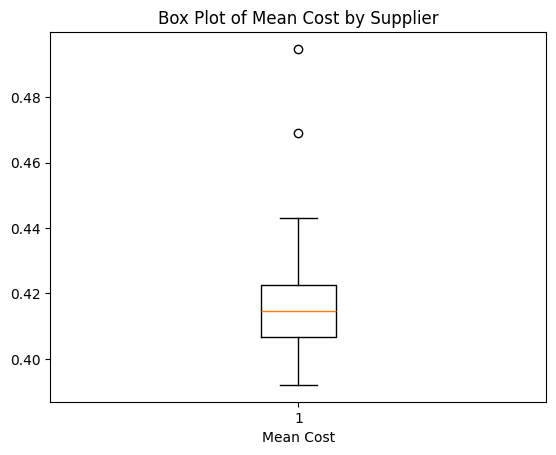

In [98]:
# Plotting the distribution of suppliers
plt.boxplot(avg_cost)
plt.xlabel('Mean Cost')
plt.title('Box Plot of Mean Cost by Supplier')
plt.show()

In [99]:
# Worst-performing ((modifiable) Standard : 10%)
cost_threshold = avg_cost.quantile(q=0.95)

chosen_suppliers = avg_cost[avg_cost.values < cost_threshold]

suppliers_trimmed = suppliers[suppliers.index.isin(chosen_suppliers.index)]

# Using this threshold, 4 suppliers were trimmed from the dataset
print('Suppliers removed:', len(suppliers)-len(suppliers_trimmed))

Suppliers removed: 4


# 2. EDA

Exploratory Data Analysis: (EDA): Consider using various EDA techniques to explore the
distribution of feature values, cost data and supplier performance:

## 2.1. Distribution of task features
* Use EDA methods to analyse the distribution of task features and interpret emerging patterns.

## 2.2. Analysis cost data
* Analyse the cost data to identify patterns and good combinations of tasks and suppliers.

## 2.3. Errors and RMSE
* Explore how errors (Eq. 1) are distributed across different choices of suppliers, identifying
key trends or outliers in their performance. Calculate the RMSE (Eq .2) of each supplier for
all tasks.

In [100]:
# Import libraries for RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

# 3. ML model fitting and scoring
* ML model fitting and scoring: In this step, you will need to split the data into input features and
output values. In addition, you will create training and testing datasets. One particularity of this
case study is that the same task appears in both training and testing, thus data must be grouped
by task when creating training and validation sets.

## 3.1. Combine data
* Combine the task features, supplier features and costs into a single dataset
* Each Task ID (and its corresponding feature values) will appear multiple times (once for
each supplier). The number of rows of this dataset must be the same as the number of rows
in ‘costs.csv’. Then split the dataset into X (TF1,…,TFn, SF1,…, SFm), y (Cost), and
Groups (Task ID). Note that there will be fewer task features (TFi ) than in the original data
because of the features removed in Step 1 above.

In [139]:
combined_df = pd.merge(cost, tasks, how='inner', on='Task ID')
combined_df

,Task ID,Supplier ID,Cost,TF39,TF37,TF116,TF114,TF28,TF45,TF110,...,TF83,TF86,TF87,TF58,TF55,TF40,TF53,TF60,TF99,TF57
0,T34,S1,0.478219,0.08,33098400,0.06,0.315479,18.669118,93177816,903728.98,...,513,12746133.25,52077023,298130560,0.30,1412,0.34,909,418,0.66
1,T34,S2,0.444543,0.08,33098400,0.06,0.315479,18.669118,93177816,903728.98,...,513,12746133.25,52077023,298130560,0.30,1412,0.34,909,418,0.66
2,T34,S3,0.521679,0.08,33098400,0.06,0.315479,18.669118,93177816,903728.98,...,513,12746133.25,52077023,298130560,0.30,1412,0.34,909,418,0.66
3,T34,S4,0.307331,0.08,33098400,0.06,0.315479,18.669118,93177816,903728.98,...,513,12746133.25,52077023,298130560,0.30,1412,0.34,909,418,0.66
4,T34,S5,0.357689,0.08,33098400,0.06,0.315479,18.669118,93177816,903728.98,...,513,12746133.25,52077023,298130560,0.30,1412,0.34,909,418,0.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7675,T130,S60,0.410605,0.11,60635933,0.02,0.063807,22.186747,95145088,8427018.28,...,789,25676129.00,87007134,303590517,0.44,2472,0.22,1541,382,0.78
7676,T130,S61,0.410376,0.11,60635933,0.02,0.063807,22.186747,95145088,8427018.28,...,789,25676129.00,87007134,303590517,0.44,2472,0.22,1541,382,0.78
7677,T130,S62,0.407884,0.11,60635933,0.02,0.063807,22.186747,95145088,8427018.28,...,789,25676129.00,87007134,303590517,0.44,2472,0.22,1541,382,0.78
7678,T130,S63,0.420536,0.11,60635933,0.02,0.063807,22.186747,95145088,8427018.28,...,789,25676129.00,87007134,303590517,0.44,2472,0.22,1541,382,0.78


In [140]:
# Combine dataset
df = pd.merge(combined_df, suppliers, how='inner', on='Supplier ID')
print('The number of rows in the costs dataframe were: ', cost.shape[0], \
      ' and the number of rows of the new dataframe is: ',df.shape[0])

The number of rows in the costs dataframe were:  7680  and the number of rows of the new dataframe is:  7680


Some Supplier ID values in the costs dataset do not exist in the suppliers dataset, resulting in rows being dropped during the inner merge.


In [103]:
# df = df.drop('Supplier ID', axis = 1)
# df.head(1)

,Task ID,Cost,TF39,TF37,TF116,TF114,TF28,TF45,TF110,TF74,...,SF10,SF12,SF6,SF1,SF7,SF4,SF5,SF3,SF11,SF9
0,T34,0.478219,0.08,33098400,0.06,0.315479,18.669118,93177816,903728.98,384,...,100,5,10,100,2,50,20,1000,1000,2000


In [141]:
# Split dataset into X, y, Group
X = df.iloc[:,3:]
y = df.iloc[:,2]   # Cost
Groups = df.iloc[:,0]   # Task ID

## 3.2. Train teset split
* Randomly select 20 unique ‘Task ID’ values from Groups (let’s call this subset TestGroup).
Split the dataset created in Step 3.1 into four different datasets (X_train, X_test,
y_train and y_test) as follows. X_train, X_test contain only the columns TF1,…,TFn,
SF1,…, SFm; whereas y_train,y_test contain only the column ‘Cost’. Also, X_test,
y_test contain only rows whose Task IDs are in TestGroup; whereas X_train, y_train
contain the remainder rows.

In [142]:
# Randomly select 20 groups
import random
random.seed(42)
TestGroup = random.sample(list(df['Task ID'].unique()), 20)
TestGroup

['T92',
 'T14',
 'T3',
 'T105',
 'T44',
 'T39',
 'T33',
 'T29',
 'T28',
 'T97',
 'T125',
 'T80',
 'T20',
 'T86',
 'T63',
 'T7',
 'T31',
 'T37',
 'T75',
 'T88']

In [150]:
# Also, X_test, y_test contain only rows whose Task IDs are in TestGroup
# whereas X_train, y_train contain the remainder rows

test = df[df['Task ID'].isin(TestGroup)].sort_values(by='Task ID').reset_index(drop=True)
train = df[~df['Task ID'].isin(TestGroup)].sort_values(by='Task ID').reset_index(drop=True)

X_test = test.drop(['Cost', 'Supplier ID', 'Task ID'], axis=1)
y_test = test.iloc[:,2]
X_train = train.drop(['Cost', 'Supplier ID', 'Task ID'], axis=1)
y_train = train.iloc[:,2]

In [151]:
len(test['Task ID'].unique())

20

In [152]:
print(X_train.shape)
X_test.shape

(6400, 117)


(1280, 117)

In [154]:
# Replace any missing values in X_train and y_train
X_train = X_train.fillna(0)
y_train = y_train[X_train.index]  # Align y_train with the dropped rows in X_train

X_test = X_test.fillna(0)
y_test = y_test[X_test.index]

In [148]:
print(X_train.shape)
X_test.shape

(6400, 117)


(1280, 118)

## 3.3. Train a regression ML model

* Score the performance of the model on the X_test and y_test using the score function of the model. When using a regression model, the ML model predicts the cost of each supplier for a given task, thus the supplier selected by the ML model in Eq. (1) is the one with the lowest predicted cost. Note that Eq. (1) uses the actual cost of the selected supplier, not the predicted cost

### Basic Models:

* ~Linear Regression (LinearRegression):
<br>Usage: Simple and widely used for baseline performance.
<br>Pros: Easy to interpret, quick to train.
<br>Cons: Limited to linear relationships.~

* Ridge Regression (Ridge):
<br>Usage: Handles multicollinearity by adding L2 regularization.
<br>Pros: Reduces overfitting.
<br>Cons: Coefficients shrink but don't eliminate irrelevant features.

* Lasso Regression (Lasso):
<br>Usage: Uses L1 regularization to perform feature selection.
<br>Pros: Can set coefficients to zero, eliminating unnecessary features.
<br>Cons: Can be computationally intensive with large datasets.

* ElasticNet (ElasticNet):
<br>Usage: Combines L1 (Lasso) and L2 (Ridge) regularization.
<br>Pros: Flexible, handles feature selection and regularization.
<br>Cons: Requires tuning two hyperparameters.

### Advanced Models:

* Decision Tree Regression (DecisionTreeRegressor):
<br>Usage: Non-linear relationships, interpretable decision rules.
<br>Pros: Captures complex interactions.
<br>Cons: Prone to overfitting if not properly tuned.

* Random Forest Regression (RandomForestRegressor):
<br>Usage: Ensemble method using multiple decision trees.
<br>Pros: Reduces overfitting, handles non-linear data well.
<br>Cons: Computationally intensive for large datasets.

* Gradient Boosting Regression (GradientBoostingRegressor):
<br>Usage: Builds an additive model in a forward stage-wise fashion.
<br>Pros: High accuracy, robust to outliers.
<br>Cons: Can be slow to train, requires careful tuning.

* XGBoost (XGBRegressor):
<br>Usage: Optimized version of gradient boosting.
<br>Pros: Highly efficient, handles missing data well.
<br>Cons: More complex, requires tuning.

* ~Support Vector Regression (SVR):
<br>Usage: Works well for small datasets and complex relationships.
<br>Pros: Effective for non-linear data when using kernels.
<br>Cons: Computationally expensive for large datasets.~

### 3.3.1 (Basic)Ridge Regression

In [155]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0, random_state = 42)
ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)

ridge_score = ridge.score(X_test, y_test)  # R2 score
print('Ridge Score:', ridge_score)

Ridge Score: -2.3815566764430893


A negative R-squared isn't necessarily an error, but it indicates the model needs improvement. By investigating the data, hyperparameters, and model fit, you can refine your approach and achieve better results.

### 3.3.2. (Basic) Lasso Regression

In [156]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0, random_state = 42, max_iter = 10000)
lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)

lasso_score = lasso.score(X_test, y_test)  # R2 score
print('Lasso Score:', lasso_score)

Lasso Score: 0.7542632786366303


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.831e+00, tolerance: 1.721e-03
  model = cd_fast.enet_coordinate_descent(


### 3.3.3. (Basic) ElasticNet

In [157]:
from sklearn.linear_model import ElasticNet

elnet = ElasticNet(alpha=1.0, random_state = 42, max_iter = 10000)
elnet.fit(X_train, y_train)

elnet_pred = elnet.predict(X_test)

elnet_score = elnet.score(X_test, y_test)  # R2 score
print('ElasticNet Score:', elnet_score)

ElasticNet Score: 0.753322562351626


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.838e+00, tolerance: 1.721e-03
  model = cd_fast.enet_coordinate_descent(


### 3.3.4. (Advanced) DecisionTreeRegressor

In [158]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(X_train, y_train)

dtr_pred = dtr.predict(X_test)

dtr_score = dtr.score(X_test, y_test)  # R2 score
print('DecisionTreeRegressor Score:', dtr_score)

DecisionTreeRegressor Score: 0.1737040721272698


### 3.3.5. (Advanced) RandomForestRegression

In [159]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state = 42)
rfr.fit(X_train, y_train)

rfr_pred = rfr.predict(X_test)

rfr_score = rfr.score(X_test, y_test)  # R2 score
print('RandomForestRegressor Score:', rfr_score)

RandomForestRegressor Score: 0.3654288074608646


### 3.3.6. (Advanced) Gradient Boosting Regression

In [160]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state = 42)
gbr.fit(X_train, y_train)

gbr_pred = gbr.predict(X_test)

gbr_score = gbr.score(X_test, y_test)  # R2 score
print('GradientBoostingRegressor Score:', gbr_score)

GradientBoostingRegressor Score: 0.5086446190694388


### 3.3.7. (Advanced) XGBRegressor

In [161]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state = 42)
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

xgb_score = xgb.score(X_test, y_test)  # R2 score
print('XGBRegressor Score:', xgb_score)

XGBRegressor Score: 0.25662816551436507


## 3.4. Calculate the error

* Using Eq. (1) calculate the Error of the trained model for each task in TestGroup and using
Eq. (2), calculate the RMSE score.

(1) Calculate the error of the trained model for each task in TestGroup and using Equation 1.

In [138]:
test.columns

Index(['Task ID', 'Cost', 'TF39', 'TF37', 'TF116', 'TF114', 'TF28', 'TF45',
       'TF110', 'TF74',
       ...
       'SF10', 'SF12', 'SF6', 'SF1', 'SF7', 'SF4', 'SF5', 'SF3', 'SF11',
       'SF9'],
      dtype='object', length=119)

In [162]:
test_df = test.iloc[:, 0:3]
test_df['Predicted Cost_ridge'] = ridge_pred
test_df['Predicted Cost_lasso'] = lasso_pred
test_df['Predicted Cost_elnet'] = elnet_pred
test_df['Predicted Cost_dtr'] = dtr_pred
test_df['Predicted Cost_rfr'] = rfr_pred
test_df['Predicted Cost_gbr'] = gbr_pred
test_df['Predicted Cost_xgb'] = xgb_pred
test_df.head(1)

,Task ID,Supplier ID,Cost,Predicted Cost_ridge,Predicted Cost_lasso,Predicted Cost_elnet,Predicted Cost_dtr,Predicted Cost_rfr,Predicted Cost_gbr,Predicted Cost_xgb
0,T105,S32,0.63714,0.076785,0.563937,0.562789,0.39095,0.399067,0.435823,0.372351


In [163]:
test_df = test_df.set_index('Task ID')
test_df['Min Cost'] = test_df.groupby('Task ID').Cost.agg(min=np.min)
test_df

<ipython-input-163-b072aee07ad0>:2: FutureWarning: The provided callable <function min at 0x78a787fe4dc0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  test_df['Min Cost'] = test_df.groupby('Task ID').Cost.agg(min=np.min)


,Supplier ID,Cost,Predicted Cost_ridge,Predicted Cost_lasso,Predicted Cost_elnet,Predicted Cost_dtr,Predicted Cost_rfr,Predicted Cost_gbr,Predicted Cost_xgb,Min Cost
Task ID,,,,,,,,,,
T105,S32,0.637140,0.076785,0.563937,0.562789,0.390950,0.399067,0.435823,0.372351,0.557944
T105,S34,0.614130,0.069017,0.572530,0.564539,0.376566,0.379374,0.417776,0.339432,0.557944
T105,S35,0.661260,0.077524,0.575567,0.572591,0.381370,0.387722,0.434624,0.353118,0.557944
T105,S36,0.637136,0.079373,0.573448,0.571654,0.376864,0.396165,0.431556,0.370103,0.557944
T105,S37,0.655428,0.070992,0.574817,0.568193,0.386200,0.379662,0.423833,0.362102,0.557944
...,...,...,...,...,...,...,...,...,...,...
T97,S38,0.510999,0.504032,0.468256,0.472067,0.519296,0.469119,0.480215,0.489684,0.421872
T97,S37,0.443689,0.485800,0.467016,0.464657,0.514324,0.464365,0.468465,0.475804,0.421872
T97,S36,0.457300,0.494181,0.465647,0.468117,0.526264,0.464581,0.472027,0.493326,0.421872


the Error is the difference in cost
between the supplier selected by the ML model and the actual best supplier for this task.

In [167]:
# Predicted cost list
test_df_list = ['Predicted Cost_ridge', 'Predicted Cost_lasso',
                'Predicted Cost_elnet', 'Predicted Cost_dtr', 'Predicted Cost_rfr',
                'Predicted Cost_gbr', 'Predicted Cost_xgb']

# Calculate error (selected by ML - min cost)
for i in test_df_list:
    test_df['Error_'+i] = test_df[i] - test_df['Min Cost']

test_df

,Supplier ID,Cost,Predicted Cost_ridge,Predicted Cost_lasso,Predicted Cost_elnet,Predicted Cost_dtr,Predicted Cost_rfr,Predicted Cost_gbr,Predicted Cost_xgb,Min Cost,ErrorPredicted Cost_ridge,ErrorPredicted Cost_lasso,ErrorPredicted Cost_elnet,ErrorPredicted Cost_dtr,ErrorPredicted Cost_rfr,ErrorPredicted Cost_gbr,ErrorPredicted Cost_xgb
Task ID,,,,,,,,,,,,,,,,,
T105,S32,0.637140,0.076785,0.563937,0.562789,0.390950,0.399067,0.435823,0.372351,0.557944,-0.481159,0.005992,0.004844,-0.166994,-0.158877,-0.122121,-0.185594
T105,S34,0.614130,0.069017,0.572530,0.564539,0.376566,0.379374,0.417776,0.339432,0.557944,-0.488928,0.014585,0.006594,-0.181378,-0.178570,-0.140168,-0.218513
T105,S35,0.661260,0.077524,0.575567,0.572591,0.381370,0.387722,0.434624,0.353118,0.557944,-0.480420,0.017623,0.014646,-0.176575,-0.170223,-0.123321,-0.204826
T105,S36,0.637136,0.079373,0.573448,0.571654,0.376864,0.396165,0.431556,0.370103,0.557944,-0.478572,0.015504,0.013710,-0.181081,-0.161780,-0.126388,-0.187842
T105,S37,0.655428,0.070992,0.574817,0.568193,0.386200,0.379662,0.423833,0.362102,0.557944,-0.486952,0.016873,0.010249,-0.171744,-0.178283,-0.134112,-0.195842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T97,S38,0.510999,0.504032,0.468256,0.472067,0.519296,0.469119,0.480215,0.489684,0.421872,0.082159,0.046383,0.050195,0.097423,0.047246,0.058343,0.067812
T97,S37,0.443689,0.485800,0.467016,0.464657,0.514324,0.464365,0.468465,0.475804,0.421872,0.063928,0.045143,0.042784,0.092451,0.042493,0.046592,0.053931
T97,S36,0.457300,0.494181,0.465647,0.468117,0.526264,0.464581,0.472027,0.493326,0.421872,0.072308,0.043774,0.046245,0.104391,0.042708,0.050155,0.071454


In [170]:
len(test_df.index.unique())

20

In [172]:
result_df = test_df[test_df['Cost'] == test_df['Min Cost']]
result_df

,Supplier ID,Cost,Predicted Cost_ridge,Predicted Cost_lasso,Predicted Cost_elnet,Predicted Cost_dtr,Predicted Cost_rfr,Predicted Cost_gbr,Predicted Cost_xgb,Min Cost,ErrorPredicted Cost_ridge,ErrorPredicted Cost_lasso,ErrorPredicted Cost_elnet,ErrorPredicted Cost_dtr,ErrorPredicted Cost_rfr,ErrorPredicted Cost_gbr,ErrorPredicted Cost_xgb
Task ID,,,,,,,,,,,,,,,,,
T105,S33,0.557944,0.065043,0.576975,0.571070,0.365895,0.398435,0.413556,0.357632,0.557944,-0.492902,0.019031,0.013126,-0.192050,-0.159510,-0.144388,-0.200313
T125,S64,0.374692,0.376708,0.407628,0.407993,0.420607,0.416896,0.427055,0.418935,0.374692,0.002015,0.032936,0.033300,0.045915,0.042203,0.052363,0.044243
T14,S15,0.301029,0.305055,0.350420,0.348085,0.297256,0.329167,0.340989,0.339708,0.301029,0.004026,0.049391,0.047056,-0.003772,0.028139,0.039960,0.038679
T20,S60,0.309255,0.462562,0.363946,0.363669,0.353568,0.345764,0.357006,0.342643,0.309255,0.153306,0.054691,0.054413,0.044313,0.036508,0.047751,0.033387
T28,S56,0.305760,0.333230,0.353794,0.351588,0.318635,0.304097,0.329905,0.307721,0.305760,0.027470,0.048035,0.045828,0.012875,-0.001663,0.024145,0.001961
T29,S15,0.309453,0.294868,0.355785,0.357264,0.371571,0.353283,0.340110,0.355902,0.309453,-0.014585,0.046333,0.047812,0.062118,0.043831,0.030657,0.046450
T3,S56,0.310395,0.414150,0.385867,0.383030,0.321380,0.320988,0.341832,0.322937,0.310395,0.103756,0.075472,0.072635,0.010985,0.010593,0.031438,0.012542
T31,S39,0.404232,0.352678,0.429470,0.423917,0.505408,0.459715,0.463788,0.452028,0.404232,-0.051554,0.025238,0.019685,0.101176,0.055483,0.059556,0.047797
T33,S57,0.388173,0.358002,0.414035,0.412014,0.473212,0.447561,0.453274,0.452275,0.388173,-0.030171,0.025862,0.023841,0.085039,0.059387,0.065101,0.064102


(2) Calculate the RMSE score

In [174]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.metrics import mean_squared_error

ridge_rmse = mean_squared_error(y_test, ridge_pred, squared=False)
lasso_rmse = mean_squared_error(y_test, lasso_pred, squared=False)
elnet_rmse = mean_squared_error(y_test, elnet_pred, squared=False)
dtr_rmse = mean_squared_error(y_test, dtr_pred, squared=False)
rfr_rmse = mean_squared_error(y_test, rfr_pred, squared=False)
gbr_rmse = mean_squared_error(y_test, gbr_pred, squared=False)
xgb_rmse = mean_squared_error(y_test, xgb_pred, squared=False)

print('ridge_rmse', ridge_rmse)
print('lasso_rmse', lasso_rmse)
print('elnet_rmse', elnet_rmse)
print('dtr_rmse', dtr_rmse)
print('rfr_rmse', rfr_rmse)
print('gbr_rmse', gbr_rmse)
print('xgb_rmse', xgb_rmse)

ridge_rmse 0.13696808232430047
lasso_rmse 0.03692292258240038
elnet_rmse 0.036993528261797706
dtr_rmse 0.06770626335203027
rfr_rmse 0.05933367059922512
gbr_rmse 0.05221062572775024
xgb_rmse 0.06421908168238259


## 3.5. Compare Errors and RMSE

* Compare to the values obtained in Step 2.3 and summarise your
conclusions.

# 4. Cross-Validation

In Step 3, we have done a simple train-test split grouped by Task ID. Now you
will do a Leave-One-Out cross-validation grouped by Task ID. Fortunately, scikit-learn already
provides a Leave-One-Group-Out cross-validation type. Starting from the datasets created in
Step 3.1, perform a Leave-One-Group-Out cross-validation using the Groups dataset to define
the groups (read the documentation and examples of Leave-One-Group-Out cross-validation to
learn how to specify the groups). In addition, we wish to use, within the cross-validation, our own
score function (Eq. 1) for scoring. You will need to use the scikit-learn function ‘make_scorer’,
as shown in the lectures, to create a ‘score’ function that can be passed to scikit-learn’s cross-
validation function. Report the scores returned by cross-validation and compute the RMSE of the scores returned. Compare with the results obtained in Steps 2.3 and 3.5.
> Hint: If your computer has multiple CPUs, use the n_jobs parameter to use all CPUs in
parallel.


In [178]:
from sklearn.model_selection import LeaveOneGroupOut, cross_val_score
from sklearn.metrics import make_scorer
import numpy as np

# Custom error function based on Eq. 1
def custom_error(y_true, y_pred):
    min_cost = np.min(np.abs(y_true - y_pred))
    actual_cost = np.abs(y_true - y_pred)
    error = min_cost - actual_cost

    # Return the mean error as the score
    return np.mean(error)

# Convert
custom_scorer = make_scorer(custom_error, greater_is_better=True)

## 4.1. Ridge CV

In [181]:
# Leave-One-Group-Out CV
logo = LeaveOneGroupOut()

# Train Group
TrainGroup = train.iloc[:,0]

# 1. Eq 1. Score
scores = cross_val_score(ridge, X_train, y_train, groups=TrainGroup, cv=logo, scoring=custom_scorer, n_jobs = -1)
overall_score = np.mean(scores)
print("Overall custom score:", overall_score)

# 2. Eq 2. RMSE
rmse_scores = cross_val_score(ridge, X_train, y_train, groups=TrainGroup, cv=logo, scoring='neg_root_mean_squared_error', n_jobs=-1)

# Positive (multiplied -1)
rmse_scores = -rmse_scores
overall_rmse = np.mean(rmse_scores)

print("Overall RMSE:", overall_rmse)

Overall custom score: -0.02679267626143823
Overall RMSE: 0.03803489991134805


## 4.2. Lasso CV

In [182]:
# Leave-One-Group-Out CV
logo = LeaveOneGroupOut()

# Train Group
TrainGroup = train.iloc[:,0]

# 1. Eq 1. Score
scores = cross_val_score(lasso, X_train, y_train, groups=TrainGroup, cv=logo, scoring=custom_scorer, n_jobs = -1)
overall_score = np.mean(scores)
print("Overall custom score:", overall_score)

# 2. Eq 2. RMSE
rmse_scores = cross_val_score(lasso, X_train, y_train, groups=TrainGroup, cv=logo, scoring='neg_root_mean_squared_error', n_jobs=-1)

# Positive (multiplied -1)
rmse_scores = -rmse_scores
overall_rmse = np.mean(rmse_scores)

print("Overall RMSE:", overall_rmse)

Overall custom score: -0.026455149241132424
Overall RMSE: 0.03379505725375791


## 4.3. ElasticNet CV

In [183]:
# Leave-One-Group-Out CV
logo = LeaveOneGroupOut()

# Train Group
TrainGroup = train.iloc[:,0]

# 1. Eq 1. Score
scores = cross_val_score(elnet, X_train, y_train, groups=TrainGroup, cv=logo, scoring=custom_scorer, n_jobs = -1)
overall_score = np.mean(scores)
print("Overall custom score:", overall_score)

# 2. Eq 2. RMSE
rmse_scores = cross_val_score(elnet, X_train, y_train, groups=TrainGroup, cv=logo, scoring='neg_root_mean_squared_error', n_jobs=-1)

# Positive (multiplied -1)
rmse_scores = -rmse_scores
overall_rmse = np.mean(rmse_scores)

print("Overall RMSE:", overall_rmse)

Overall custom score: -0.026332366933620815
Overall RMSE: 0.03367609178677069


## 4.4. DecisionTreeRegressor CV

In [184]:
# Leave-One-Group-Out CV
logo = LeaveOneGroupOut()

# Train Group
TrainGroup = train.iloc[:,0]

# 1. Eq 1. Score
scores = cross_val_score(dtr, X_train, y_train, groups=TrainGroup, cv=logo, scoring=custom_scorer, n_jobs = -1)
overall_score = np.mean(scores)
print("Overall custom score:", overall_score)

# 2. Eq 2. RMSE
rmse_scores = cross_val_score(dtr, X_train, y_train, groups=TrainGroup, cv=logo, scoring='neg_root_mean_squared_error', n_jobs=-1)

# Positive (multiplied -1)
rmse_scores = -rmse_scores
overall_rmse = np.mean(rmse_scores)

print("Overall RMSE:", overall_rmse)

Overall custom score: -0.027868229929537337
Overall RMSE: 0.03483088378233987


## 4.5. RandomForestRegressor CV

In [ ]:
# Leave-One-Group-Out CV
logo = LeaveOneGroupOut()

# Train Group
TrainGroup = train.iloc[:,0]

# 1. Eq 1. Score
scores = cross_val_score(rfr, X_train, y_train, groups=TrainGroup, cv=logo, scoring=custom_scorer, n_jobs = -1)
overall_score = np.mean(scores)
print("Overall custom score:", overall_score)

# 2. Eq 2. RMSE
rmse_scores = cross_val_score(rfr, X_train, y_train, groups=TrainGroup, cv=logo, scoring='neg_root_mean_squared_error', n_jobs=-1)

# Positive (multiplied -1)
rmse_scores = -rmse_scores
overall_rmse = np.mean(rmse_scores)

print("Overall RMSE:", overall_rmse)

## 4.6. Gradient Boosting Regressor

In [ ]:
# Leave-One-Group-Out CV
logo = LeaveOneGroupOut()

# Train Group
TrainGroup = train.iloc[:,0]

# 1. Eq 1. Score
scores = cross_val_score(gbr, X_train, y_train, groups=TrainGroup, cv=logo, scoring=custom_scorer, n_jobs = -1)
overall_score = np.mean(scores)
print("Overall custom score:", overall_score)

# 2. Eq 2. RMSE
rmse_scores = cross_val_score(gbr, X_train, y_train, groups=TrainGroup, cv=logo, scoring='neg_root_mean_squared_error', n_jobs=-1)

# Positive (multiplied -1)
rmse_scores = -rmse_scores
overall_rmse = np.mean(rmse_scores)

print("Overall RMSE:", overall_rmse)

## 4.7. XGBoost Regressor

In [ ]:
# Leave-One-Group-Out CV
logo = LeaveOneGroupOut()

# Train Group
TrainGroup = train.iloc[:,0]

# 1. Eq 1. Score
scores = cross_val_score(xgb, X_train, y_train, groups=TrainGroup, cv=logo, scoring=custom_scorer, n_jobs = -1)
overall_score = np.mean(scores)
print("Overall custom score:", overall_score)

# 2. Eq 2. RMSE
rmse_scores = cross_val_score(xgb, X_train, y_train, groups=TrainGroup, cv=logo, scoring='neg_root_mean_squared_error', n_jobs=-1)

# Positive (multiplied -1)
rmse_scores = -rmse_scores
overall_rmse = np.mean(rmse_scores)

print("Overall RMSE:", overall_rmse)

# 5. Hyper-parameter optimization
* Hyper-parameter optimization: Looking at the documentation for the ML model of your choice,
devise a hyper-parameter grid (param_grid) appropriate for your ML model and apply
GridSearch to identify the best hyper-parameter configuration starting from the datasets from
Step 3.1. As in Step 4, you must setup Grid Search to use Leave-One-Group cross-validation
and the scoring function from Eq. (1). Report the best hyper-parameter configuration found by
GridSearch and its RMSE. Compare the results with those obtained in Steps 2.3, 3.5 and 4.

In [ ]:
from sklearn.model_selection import GridSearchCV

## 5.1. Ridge Model

In [ ]:
# Grid range
param_grid = {'alpha': [0.1, 1, 10, 100]}

grid_search = GridSearchCV(ridge, param_grid, cv=logo, scoring = custom_scorer, n_jobs= -1)
grid_search.fit(X_train, y_train, groups=TrainGroup)

# 1. Eq 1. Score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score)

# Identifying the best model
best_ridge = grid_search.best_estimator_

# 2. Eq 2. RMSE
rmse_scores = cross_val_score(best_ridge, X_train, y_train, groups=TrainGroup, cv=logo, scoring='neg_root_mean_squared_error', n_jobs=-1)

# Positive (multiplied -1)
rmse_scores = -rmse_scores
overall_rmse = np.mean(rmse_scores)

print("Overall RMSE:", overall_rmse)

## 5.2. Lasso Model

In [ ]:
# Grid range
param_grid = {'alpha': [0.1, 1, 10, 100]}


## 5.3. Elastic Net Regression

In [ ]:
# Grid range
param_grid = {'alpha': [0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.5, 0.9]}

## 5.4. DecisionTreeRegressor

In [ ]:
# Grid range
param_grid = {'max_depth': [3, 5, 7, 9], 'min_samples_split': [2, 5, 10]}


## 5.5. RandomForestRegressor

In [ ]:
# Grid range
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7, 9], 'min_samples_split': [2, 5, 10]}


## 5.6. Gradient Boosting Regressor

In [ ]:
# Grid range
param_grid = {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.05, 0.01], 'max_depth':
 [3, 5, 7]}


## 5.7. XGBoosting Regressor

In [ ]:
# Grid range

param_grid = {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.05, 0.01], 'n_estimators': [100, 200, 300]}


# 6. Conclusion